In [1]:
using TaylorIntegration, Plots

In [55]:
function p_tilde(t, Œ∑, Œ≥, n)
    cos(2t) + Œ≥ * cos(n * t)
end

function mathieu!(du, u, p, t)
    Œ±, Œ≤, Œ∑, Œ≥, n = p
    du[1] = u[2]
    du[2] = -(Œ± + Œ≤ * p_tilde(t, Œ∑, Œ≥, n)*t) * u[1]
end

mathieu! (generic function with 1 method)

In [56]:
order = 15
abstol = 1e-20

1.0e-20

In [57]:
u = [1.0, 0.0]

2-element Vector{Float64}:
 1.0
 0.0

In [60]:
Œ±_range = -6:0.1:6
Œ≤_range = -6:0.1:6
Œ∑ = 1 
Œ≥ = 0.5 
n = 2  

2

In [61]:
stability_map = zeros(length(Œ±_range), length(Œ≤_range))

121√ó121 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ‚Ä¶  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ‚Ä¶  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ‚ãÆ                        ‚ãÆ              ‚ã±       ‚ãÆ                        ‚ãÆ
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  

In [62]:
for (i, Œ±) in enumerate(Œ±_range)
    for (j, Œ≤) in enumerate(Œ≤_range)
        t, q = taylorinteg(mathieu!, u, 0.0, 2œÄ, 15, 1.0e-15, (Œ±, Œ≤, Œ∑, Œ≥, n))
        
        if maximum(abs.(q[:,1])) > 1e3
            stability_map[i, j] = 1
        else
            stability_map[i, j] = 0
        end
    end
end

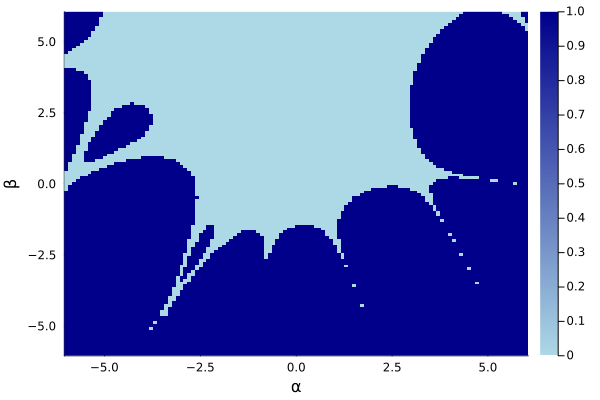

In [65]:
heatmap(Œ±_range, Œ≤_range, stability_map, xlabel="Œ±", ylabel="Œ≤", color=:blues)

In [44]:
varorder = 8
Œæ = set_variables("Œæ", numvars=2, order=varorder)
q0TN = u .+ Œæ


2-element Vector{TaylorN{Float64}}:
  1.0 + 1.0 Œæ‚ÇÅ + ùí™(‚Äñx‚Äñ‚Åπ)
        1.0 Œæ‚ÇÇ + ùí™(‚Äñx‚Äñ‚Åπ)

In [45]:
tt, rr = taylorinteg(mathieu!, q0TN, 0, 2œÄ, 15, 1.0e-15, (0.1, 0.1, Œ∑, Œ≥, n))

([0.0, 0.22745875766141924, 0.46506787769335084, 0.7038591776628457, 0.9347214872976014, 1.178929160942047, 1.4265651165711788, 1.6646049579307842, 1.9133369381704446, 2.169524099435563  ‚Ä¶  4.349374163271925, 4.581444646560284, 4.816570082654254, 5.067896849300165, 5.292008071089921, 5.513350831560584, 5.753568429804657, 5.971189806327666, 6.1852067054845685, 6.283185307179586], TaylorN{Float64}[ 1.0 + 1.0 Œæ‚ÇÅ + ùí™(‚Äñx‚Äñ‚Åπ)  1.0 Œæ‚ÇÇ + ùí™(‚Äñx‚Äñ‚Åπ);  0.9935729689718533 + 0.9935729689718533 Œæ‚ÇÅ + 0.22697326768471043 Œæ‚ÇÇ + ùí™(‚Äñx‚Äñ‚Åπ)  - 0.05616095294062125 - 0.05616095294062125 Œæ‚ÇÅ + 0.9936391144138982 Œæ‚ÇÇ + ùí™(‚Äñx‚Äñ‚Åπ); ‚Ä¶ ;  - 0.46668106810782684 - 0.46668106810782684 Œæ‚ÇÅ + 3.994085851453951 Œæ‚ÇÇ + ùí™(‚Äñx‚Äñ‚Åπ)  - 0.2049122980731715 - 0.2049122980731715 Œæ‚ÇÅ - 0.38905089982154845 Œæ‚ÇÇ + ùí™(‚Äñx‚Äñ‚Åπ);  - 0.48619178836944715 - 0.48619178836944715 Œæ‚ÇÅ + 3.951204335591768 Œæ‚ÇÇ + ùí™(‚Äñx‚Äñ‚Åπ)  - 0.19326197282271232 - 0.19326197282271232 

In [46]:
rr

28√ó2 view(transpose(view(::Matrix{TaylorN{Float64}}, :, 1:28)), 1:28, :) with eltype TaylorN{Float64}:
                                                            1.0 + 1.0 Œæ‚ÇÅ + ùí™(‚Äñx‚Äñ‚Åπ)  ‚Ä¶                                                                    1.0 Œæ‚ÇÇ + ùí™(‚Äñx‚Äñ‚Åπ)
     0.9935729689718533 + 0.9935729689718533 Œæ‚ÇÅ + 0.22697326768471043 Œæ‚ÇÇ + ùí™(‚Äñx‚Äñ‚Åπ)       - 0.05616095294062125 - 0.05616095294062125 Œæ‚ÇÅ + 0.9936391144138982 Œæ‚ÇÇ + ùí™(‚Äñx‚Äñ‚Åπ)
      0.9736507810334282 + 0.9736507810334282 Œæ‚ÇÅ + 0.4610461652112404 Œæ‚ÇÇ + ùí™(‚Äñx‚Äñ‚Åπ)       - 0.11044303371387806 - 0.11044303371387806 Œæ‚ÇÅ + 0.9747649581552958 Œæ‚ÇÇ + ùí™(‚Äñx‚Äñ‚Åπ)
       0.9415490070619252 + 0.9415490070619252 Œæ‚ÇÅ + 0.690626531393874 Œæ‚ÇÇ + ùí™(‚Äñx‚Äñ‚Åπ)        - 0.15683213960537018 - 0.15683213960537018 Œæ‚ÇÅ + 0.947043177492956 Œæ‚ÇÇ + ùí™(‚Äñx‚Äñ‚Åπ)
      0.9010981237683682 + 0.9010981237683682 Œæ‚ÇÅ + 0.9057911311335932 Œæ‚ÇÇ + ùí™(‚Äñx‚Äñ‚Åπ)   

In [47]:
u0 = [1.0, 0.0]
params = [0.1, 0.1, Œ∑, Œ≥, n]  
paramTN = [params[1] + Œæ[1], params[2] + Œæ[2], params[3], params[4], params[5]]


5-element Vector{TaylorN{Float64}}:
  0.1 + 1.0 Œæ‚ÇÅ + ùí™(‚Äñx‚Äñ‚Åπ)
  0.1 + 1.0 Œæ‚ÇÇ + ùí™(‚Äñx‚Äñ‚Åπ)
           1.0 + ùí™(‚Äñx‚Äñ¬π)
           0.5 + ùí™(‚Äñx‚Äñ¬π)
           2.0 + ùí™(‚Äñx‚Äñ¬π)

In [54]:
tt, rr = taylorinteg(mathieu!, u0, paramTN, 0, 2œÄ, 15, 1.0e-15)

MethodError: MethodError: no method matching taylorinteg(::typeof(mathieu!), ::Vector{Float64}, ::Vector{TaylorN{Float64}}, ::Int64, ::Float64, ::Int64, ::Float64)

Closest candidates are:
  taylorinteg(::Any, ::Vector{U}, !Matched::AbstractVector{T}, ::Int64, ::T, ::Any; maxsteps, parse_eqs) where {T<:Real, U<:Number}
   @ TaylorIntegration ~/.julia/packages/TaylorIntegration/Vtu13/src/integrator.jl:815
  taylorinteg(::Any, ::Vector{S}, !Matched::AbstractVector{T}, ::Int64, ::U, ::Any; maxsteps, parse_eqs) where {S<:Number, T<:Real, U<:Real}
   @ TaylorIntegration ~/.julia/packages/TaylorIntegration/Vtu13/src/integrator.jl:993
  taylorinteg(::Any, ::Vector{S}, !Matched::T, ::U, !Matched::Int64, ::V, ::Any; maxsteps, parse_eqs) where {S<:Number, T<:Real, U<:Real, V<:Real}
   @ TaylorIntegration ~/.julia/packages/TaylorIntegration/Vtu13/src/integrator.jl:978
  ...
